<center><h1>Singh_Avantika_HW2</h1></center>
<br>
<br>

Name: Avantika Singh
<br>
Github Username: avantikasingh
<br>
USC ID: 6318590590

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import PolynomialFeatures
from tabulate import tabulate
import warnings


Get the Cycle Power Plant Data Set

### (b) Exploring the data

#### i. rows and columns

In [24]:
df = pd.read_excel("../data/Folds5x2_pp.xlsx")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


Number of rows: 9568
Number of columns: 5


##### ***What do the rows and columns represent?***



> The 4 columns are features of the dataset. These represent hourly average ambient variables


*   Temperature (AT)
*   Exhaust Vacuum (V)
*   Ambient Pressure (AP)
*   Relative Humidity (RH)

The final (fifth) column are datapoints for the net hourly electrical
energy output (PE) of a Combined Cycle Power Plant.





#### ii. pairwise scatterplots of all the varianbles

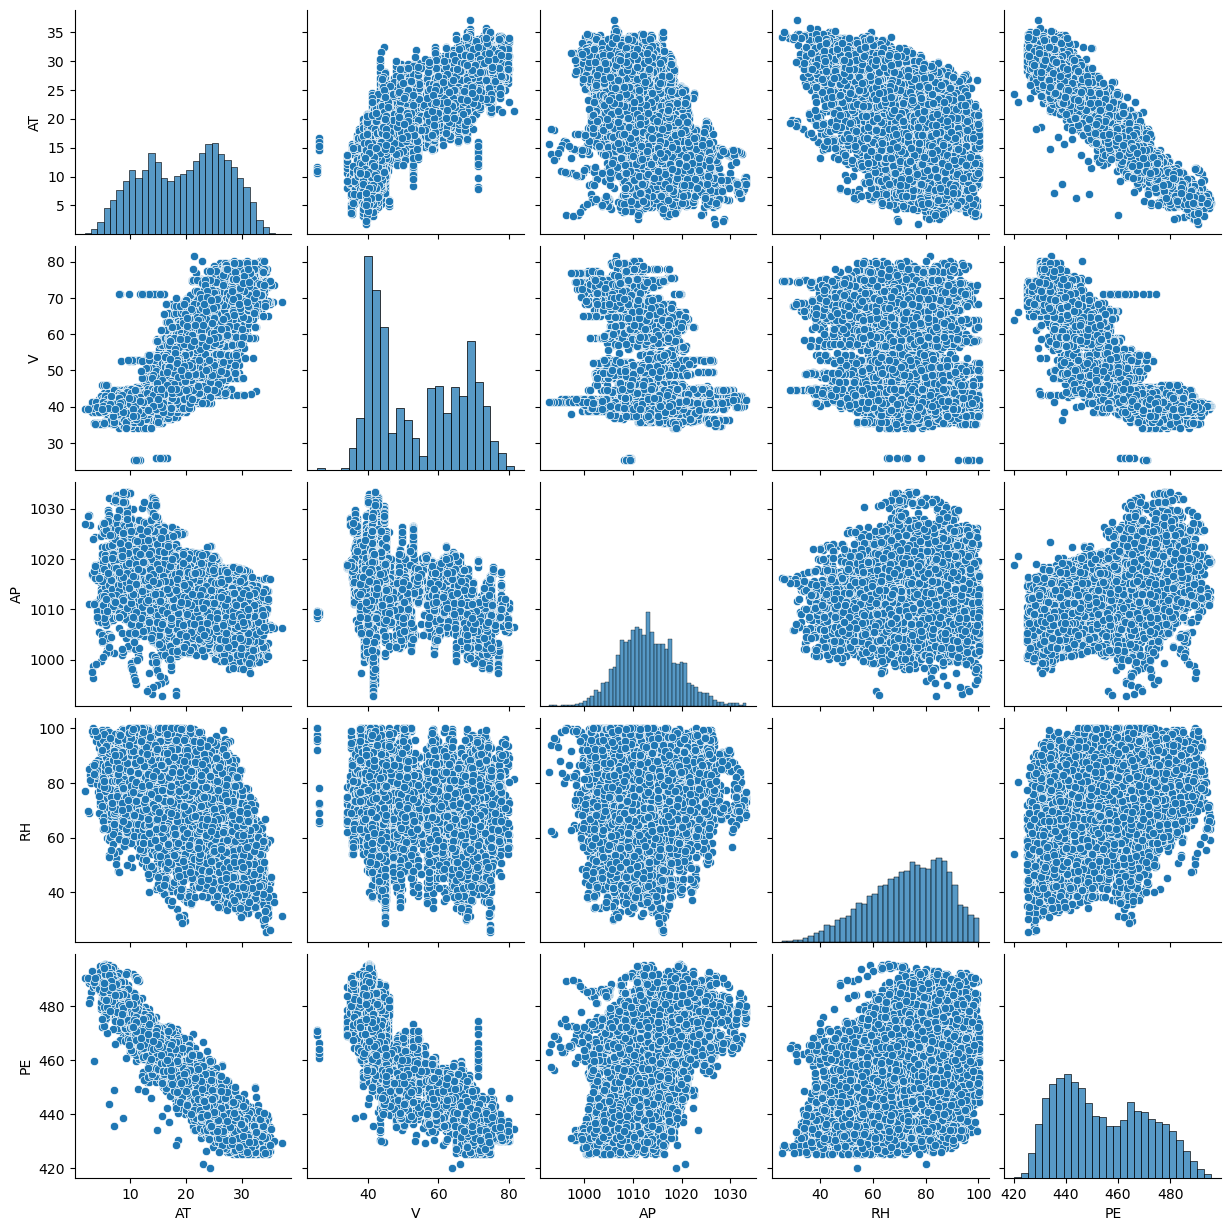

In [25]:
sns.pairplot(df)

###### ***Describe your findings***

Some correaltions that can be observed from the scatterplots are:


*   Temperature(AT) and energy (PE) have linear relationship with negative correlation
*   Temperature(AT) and vaccum (V) have linear relationship with positive correlation
*   Vaccum (V) and energy (PE) have linear relationship with negative correlation



#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [26]:
mean = []
median = []
p_range = []
first_quartile = []
third_quartile = []
interquartile = []

for cols in df.columns:
  mean.append(df[cols].mean())
  median.append(df[cols].median())
  p_range.append(df[cols].max()-df[cols].min())
  fq = df[cols].quantile(q=0.25)
  first_quartile.append(fq)
  tq = df[cols].quantile(q=0.75)
  third_quartile.append(tq)
  interquartile.append(tq - fq)

table = {
    "Feature": df.columns,
    "Mean": mean,
    "Median": median,
    "Range": p_range,
    "First Quartile": first_quartile,
    "Third Quartile": third_quartile,
    "Interquartile Range": interquartile
}

pd.DataFrame(table)


,Feature,Mean,Median,Range,First Quartile,Third Quartile,Interquartile Range
0,AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
1,V,54.305804,52.080,56.20,41.7400,66.54,24.8000
2,AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
3,RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
4,PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### (c) Simple Linear Regression

#### Fitting Simple Linear Regression
Let's assume, before training the model, the significance value be 0.05

Model Summary for Predictor Value: Temperature
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:27:34   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

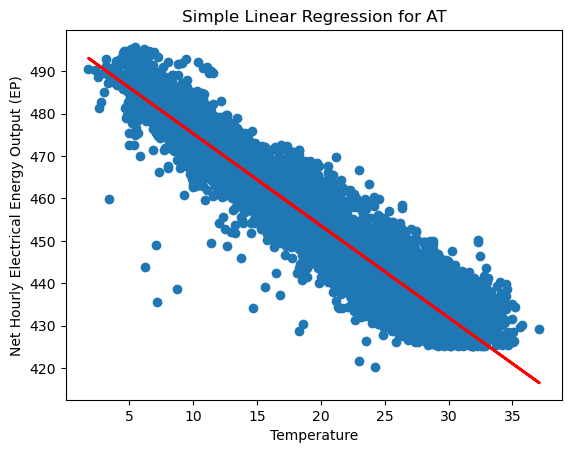

Model Summary for Predictor Value: Exhaust Vacuum
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:27:35   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

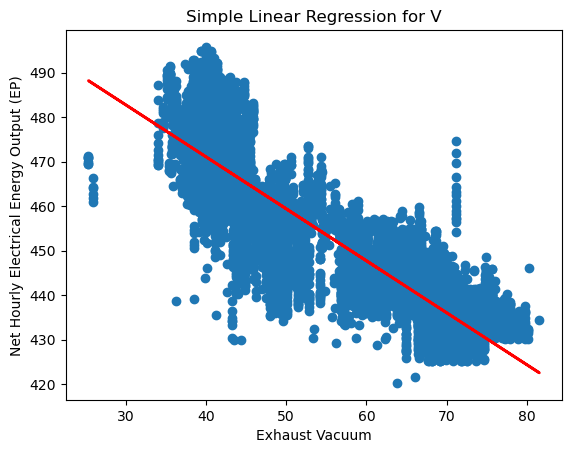

Model Summary for Predictor Value: Ambient Pressure
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:27:35   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


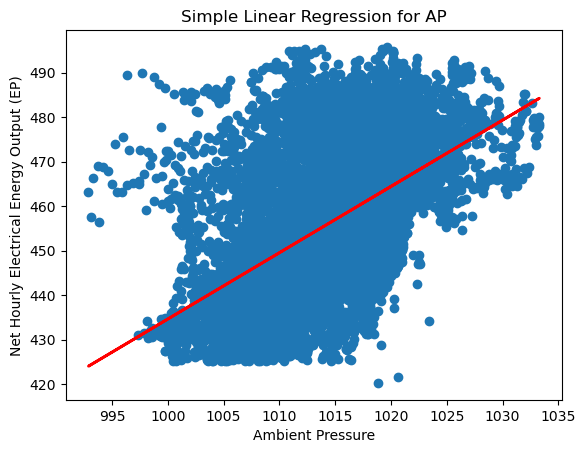

Model Summary for Predictor Value: Relative Humidity
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:27:35   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

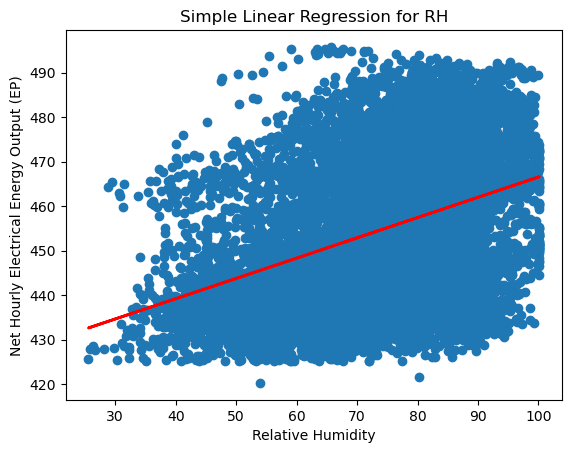

In [27]:
simple_regression_coeffs = []
# Fit simple linear regression models and analyze results for each predictor
col_name = {
    'AT' :'Temperature',
    'V': 'Exhaust Vacuum',
    'AP': 'Ambient Pressure',
    'RH' : 'Relative Humidity',
    'PE' : 'Output Energy'
}
for cols in df.columns:

  if cols != 'PE':
    X = df[cols]
    X = sm.add_constant(X)  # Add a constant (intercept)
    y = df['PE']
    model_simple= sm.OLS(y, X).fit()
    simple_regression_coeffs.append(model_simple.params[cols])

    # Print summary statistics
    print(f"Model Summary for Predictor Value: {col_name[cols]}")
    print(model_simple.summary())

    # Create a scatterplot with the regression line
    plt.scatter(df[cols], df['PE'])
    plt.xlabel(f'{col_name[cols]}')
    plt.ylabel('Net Hourly Electrical Energy Output (EP)')
    plt.plot(df[cols], model_simple.predict(X), color='red', linewidth=2)
    plt.title(f"Simple Linear Regression for {cols}")
    plt.show()

We see that the p-value for all predictors is 0.000 (< the decided significance value of 0.05). Hence, all the predictors are statistically significant.

#### Outlier Detection using IQR



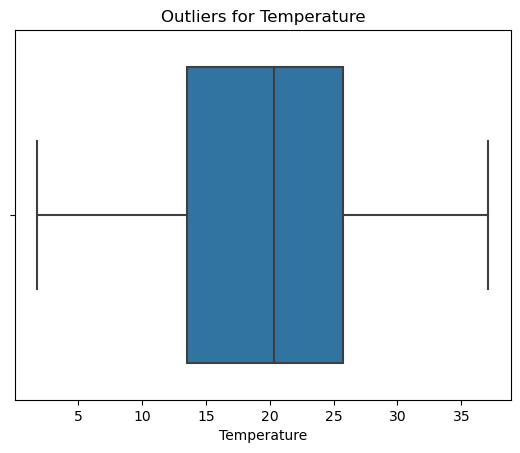

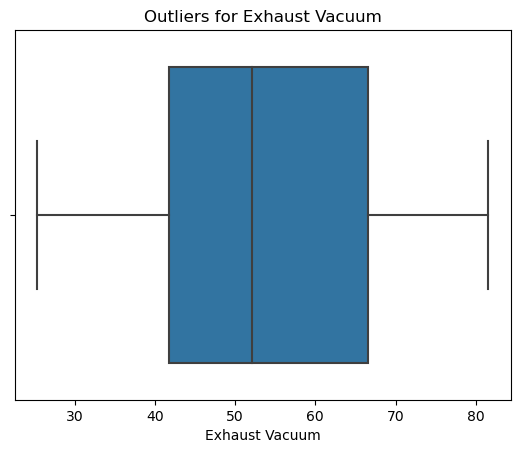

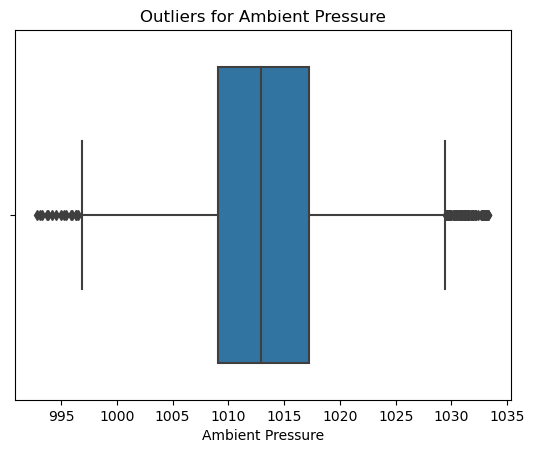

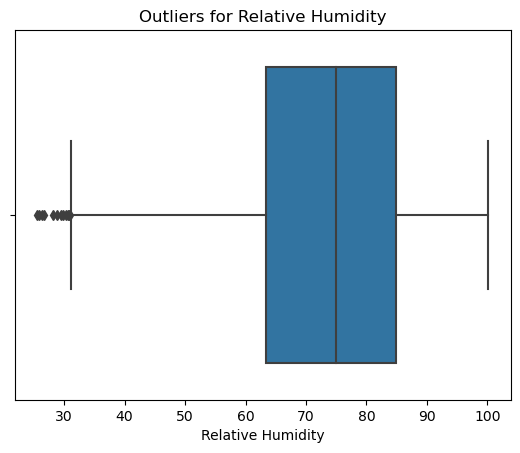

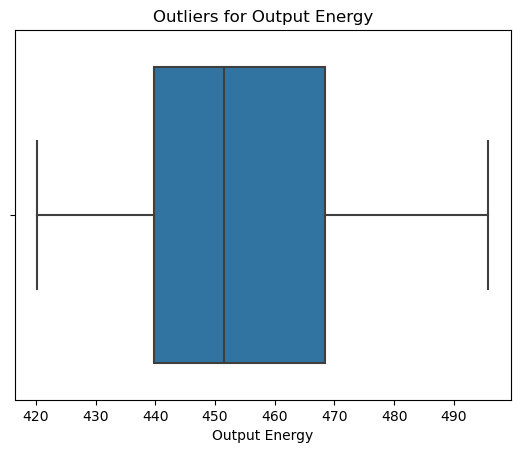

In [28]:
z_score_threshold = 3
outliers = {}
for cols in df.columns:
  # Calculate quartiles
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)

  # Calculate IQR (Interquartile Range)
  IQR = Q3 - Q1

  # Define lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify outliers
  outliers = df[(df[cols] < lower_bound) | (df[cols] > upper_bound)]
  sns.boxplot(x=df[cols])
  plt.xlabel(col_name[cols])
  plt.title(f'Outliers for {col_name[cols]}')
  plt.show()




### (d) Multiple Regression

In [29]:
# Define the predictors (independent variables)
X = df.iloc[:, 0:len(df.columns) - 1]

# Add a constant (intercept) to the predictors
X = sm.add_constant(X)

# Define the response variable
y = df['PE']  # Replace with the actual column name

# Fit a multiple regression model
model_multiple = sm.OLS(y, X).fit()
multiple_regression_coeffs = model_multiple.params[1:]

# Print the summary of the model
print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:27:35   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

Null Hypothesis can be rejected for all predictors since p-value is 0.000 (< significant value)

### (e) 1c Compare to 1d

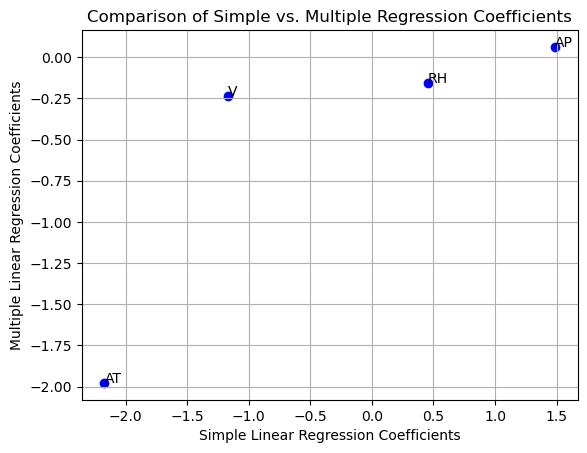

In [30]:
plt.scatter(simple_regression_coeffs, multiple_regression_coeffs, marker='o', color='b')
plt.xlabel('Simple Linear Regression Coefficients')
plt.ylabel('Multiple Linear Regression Coefficients')
plt.title('Comparison of Simple vs. Multiple Regression Coefficients')
plt.grid(True)

predictors = ['AT', 'V', 'AP', 'RH']
Y = ['PE']
# Add labels for each point (predictor)
for i, predictor in enumerate(predictors):
    plt.annotate(predictor, (simple_regression_coeffs[i], multiple_regression_coeffs[i]))


### (f) Nonlinear Association

In [31]:
for p in predictors:

  X = df[p]

  polynomial_features= PolynomialFeatures(degree=3)
  XP = polynomial_features.fit_transform(X.to_numpy().reshape(-1, 1))
  Y = df['PE']

  model_poly = sm.OLS(Y, XP).fit()

  print("")
  print(f"For predictor: {col_name[p]}")
  print(model_poly.summary())
  print("")






For predictor: Temperature
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:27:35   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281   

Observation:


*   For fetaures, Temperature, Ambient Pressure and Relative Humidity the p value for x2 and x3 is 0. This means that these are statistically significant and we can reject the null hypothesis. This is the evidence for non-linear association between predictors and response.
*   However, for feature Exhaust Vacuum, the p value for x2 is 0.768 which is larger that the significant value (0.05). Hence null hypothesis cannot be rejected. there is no evidence of non-linear association.



### (g) Interactions of Predictors

In [32]:
# Create a DataFrame to store the interaction terms
interaction_df = pd.DataFrame()
# Generate and add all pairwise interaction terms
for i in range(len(predictors)):
    for j in range(i + 1, len(predictors)):
        interaction_df[f'{predictors[i]} * {predictors[j]}'] = df[predictors[i]] * df[predictors[j]]

# Merge the interaction terms DataFrame with the original predictors
X = pd.concat([df[predictors], interaction_df], axis=1)


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:27:36   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

***Observation:*** p-values for (AT X V), (AT X RH), (V X AP), (AP X RH) are less that the significant value (0.05) Hence, these interaction terms are statistically significant.

### (h) Improvement

In [33]:
# Split the data into a training set (70%) and a test set (30%)
x_train, x_test, y_train, y_test = train_test_split(df[predictors], Y, test_size=0.3, random_state=42)

#### Model 1: Baseline model

In [34]:
# Model 1: All Predictors (Baseline Model)
x_train_1 = sm.add_constant(x_train)
model_1 = sm.OLS(y_train, x_train_1).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:27:36   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.8414     11.502     40.673      0.0

In [35]:
# Calculate train and test MSE for Model 1
y_pred_1_train = model_1.predict(x_train_1)
mse_1_train = mean_squared_error(y_train, y_pred_1_train)
y_pred_1_test = model_1.predict(sm.add_constant(x_test))
mse_1_test = mean_squared_error(y_test, y_pred_1_test)

table = [['Metric', 'Value'],
         ['Train MSE',mse_1_train],
         ['Test MSE',mse_1_test]]
lr_baseline_errors = [mse_1_train,mse_1_test]

print(tabulate(table, headers='firstrow', tablefmt='grid'))

+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Train MSE | 20.5808 |
+-----------+---------+
| Test MSE  | 21.2399 |
+-----------+---------+


#### Model 2: Interaction Terms and Quadratic Nonlinearities




In [36]:
x_train_2 = x_train.copy()

# Add interaction terms
for i in range(len(predictors)):
    for j in range(i + 1, len(predictors)):
        interaction_term = x_train[predictors[i]] * x_train[predictors[j]]
        x_train_2[f'{predictors[i]} * {predictors[j]}'] = interaction_term

# Add quadratic terms
for predictor in predictors:
    x_train_2[f'{predictor}^2'] = x_train[predictor] ** 2

x_train_2 = sm.add_constant(x_train_2)
model_2 = sm.OLS(y_train, x_train_2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:27:36   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7664.9809   1429.568     -5.362      0.0

In [37]:
# Calculate train and test MSE for Model 2
y_pred_2_train = model_2.predict(x_train_2)
mse_2_train = mean_squared_error(y_train, y_pred_2_train)

# Add interaction terms for the test data
x_test_2 = x_test.copy()
for i in range(len(predictors)):
    for j in range(i + 1, len(predictors)):
        interaction_term = x_test[predictors[i]] * x_test[predictors[j]]
        x_test_2[f'{predictors[i]} * {predictors[j]}'] = interaction_term

# Add quadratic terms for the test data
for predictor in predictors:
    x_test_2[f'{predictor}^2'] = x_test[predictor] ** 2

y_pred_2_test = model_2.predict(sm.add_constant(x_test_2))
mse_2_test = mean_squared_error(y_test, y_pred_2_test)

table = [['Metric', 'Value'],
         ['Train MSE',mse_2_train],
         ['Test MSE',mse_2_test]]

print(tabulate(table, headers='firstrow', tablefmt='grid'))
lr_model2_errors = [mse_2_train,mse_2_test]

+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Train MSE | 17.8878 |
+-----------+---------+
| Test MSE  | 18.6473 |
+-----------+---------+


##### Model 2.1: Removing Statistically Insignificant Interaction terms and Quadratic Nonlinearities

In [38]:
# Remove insignificant variables based on p-values
insignificant_predictors = [predictor for predictor, p_value in zip(x_train_2.columns, model_2.pvalues) if (p_value > 0.05 and predictor not in predictors )]
print(f"Statistically insignificant terms: {insignificant_predictors}")
x_train_3 = x_train_2.copy().drop(insignificant_predictors, axis=1)

model_3 = sm.OLS(y_train, x_train_3).fit()

# Calculate train and test MSE for Model 3
y_pred_3_train = model_3.predict(x_train_3)
mse_3_train = mean_squared_error(y_train, y_pred_3_train)

x_test_3 = x_test_2.copy().drop(insignificant_predictors, axis=1)
y_pred_3_test = model_3.predict(sm.add_constant(x_test_3))
mse_3_test = mean_squared_error(y_test, y_pred_3_test)

table = [['Metric', 'Value'],
         ['Train MSE',mse_3_train],
         ['Test MSE',mse_3_test]]

print(tabulate(table, headers='firstrow', tablefmt='grid'))
lr_model2a_errors = [mse_3_train,mse_3_test]


Statistically insignificant terms: ['AT * AP', 'V * AP', 'V * RH', 'V^2']
+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Train MSE | 17.9178 |
+-----------+---------+
| Test MSE  | 18.6943 |
+-----------+---------+


##### Model 2.2: Removing Statistically Insignificant Base Features, Interaction terms and Quadratic Nonlinearities

In [39]:
# Remove insignificant variables based on p-values
insignificant_predictors = [predictor for predictor, p_value in zip(x_train_2.columns, model_2.pvalues) if (p_value > 0.05)]
print(f"Statistically insignificant terms: {insignificant_predictors}")
x_train_4 = x_train_2.copy().drop(insignificant_predictors, axis=1)

model_4 = sm.OLS(y_train, x_train_4).fit()

# Calculate train and test MSE for Model 4
y_pred_4_train = model_4.predict(x_train_4)
mse_4_train = mean_squared_error(y_train, y_pred_4_train)

x_test_4 = x_test_2.copy().drop(insignificant_predictors, axis=1)
y_pred_4_test = model_4.predict(sm.add_constant(x_test_4))
mse_4_test = mean_squared_error(y_test, y_pred_4_test)

table = [['Metric', 'Value'],
         ['Train MSE',mse_4_train],
         ['Test MSE',mse_4_test]]

print(tabulate(table, headers='firstrow', tablefmt='grid'))
lr_model2b_errors = [mse_4_train,mse_4_test]

Statistically insignificant terms: ['V', 'AT * AP', 'V * AP', 'V * RH', 'V^2']
+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Train MSE | 18.4572 |
+-----------+---------+
| Test MSE  | 19.221  |
+-----------+---------+


### (i) KNN

KNN using raw features
+--------------------------+----------+
| Metric                   |    Value |
+==========================+==========+
| Best fit k on train data |  2       |
+--------------------------+----------+
| Min train error          |  5.50047 |
+--------------------------+----------+
| Best fit k on test data  |  5       |
+--------------------------+----------+
| Min test error           | 15.7268  |
+--------------------------+----------+


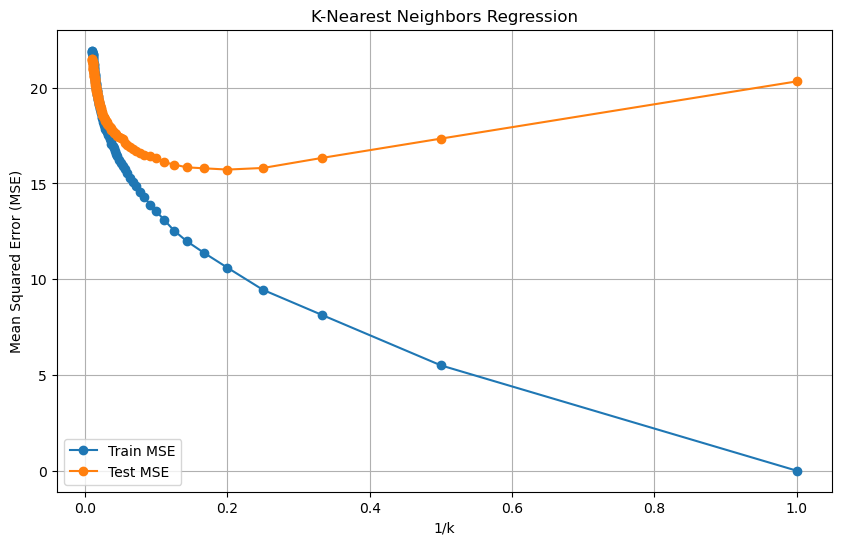


KNN using normalised features
+--------------------------+----------+
| Metric                   |    Value |
+==========================+==========+
| Best fit k on train data |  2       |
+--------------------------+----------+
| Min train error          |  5.27633 |
+--------------------------+----------+
| Best fit k on test data  |  4       |
+--------------------------+----------+
| Min test error           | 14.3057  |
+--------------------------+----------+


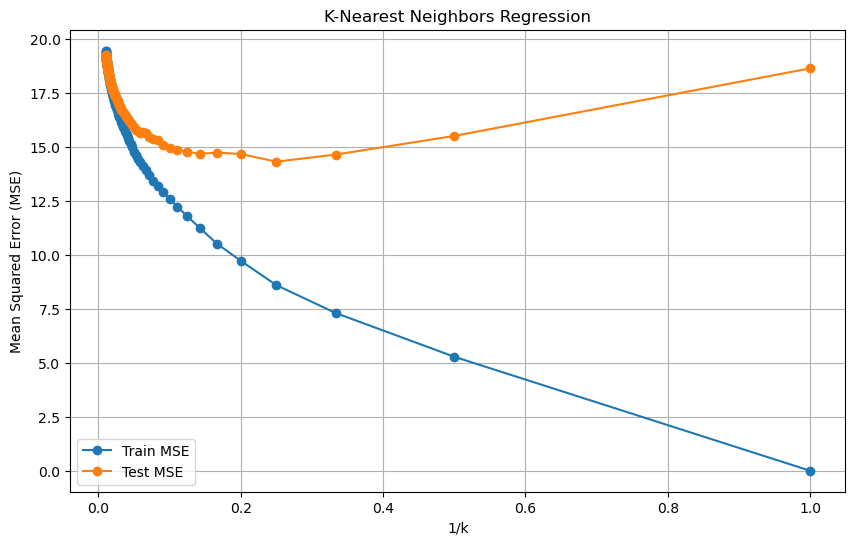

In [40]:
from math import inf
# Split the data into a training set (70%) and a test set (30%)
x_train, x_test, y_train, y_test = train_test_split(df[predictors], Y, test_size=0.3, random_state=42)

def train_knn_model(x_train,y_train,x_test,y_test, normalize):

  if(normalize==True):
    # Normalize the features using StandardScaler
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

  train_errors = []
  test_errors = []
  best_k_train = None
  best_k_test = None
  min_error_train = inf
  min_error_test = inf

  k_values = range(1, 101)

  for k in k_values:
    # Create and fit the KNN regression model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Predict on training and test data
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)

    # Calculate MSE for training and test data
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

    if(k!=1):
      if(train_mse<=min_error_train):
        best_k_train = k
        min_error_train = train_mse
      if(test_mse<=min_error_test):
        best_k_test = k
        min_error_test = test_mse

  #best_k = k_values[np.argmin(test_errors)]
  #best_test_error = min(test_errors)

  table = [['Metric', 'Value'],
           ['Best fit k on train data',best_k_train],
           ['Min train error',min_error_train],
          ['Best fit k on test data',best_k_test],
          ['Min test error',min_error_test]]

  print(tabulate(table, headers='firstrow', tablefmt='grid'))
  # Plot the errors in terms of 1/k
  plt.figure(figsize=(10, 6))
  plt.plot(1 / np.array(k_values), train_errors, label='Train MSE', marker='o')
  plt.plot(1 / np.array(k_values), test_errors, label='Test MSE', marker='o')
  plt.xlabel('1/k')
  plt.ylabel('Mean Squared Error (MSE)')
  plt.title('K-Nearest Neighbors Regression')
  plt.legend()
  plt.grid(True)
  plt.show()
  return [min_error_train, min_error_test]

print("KNN using raw features")
raw_knn_errors = train_knn_model(x_train,y_train,x_test,y_test, False)

print()
print("KNN using normalised features")
normalised_knn_error= train_knn_model(x_train,y_train,x_test,y_test, True)


### (j ) Compare KNN and Linear

In [41]:
table = [['Model', '[MSE Train, MSE Test]'],
           ['Linear Regression: Baseline Model',lr_baseline_errors],
           ['Linear Regression: with Interaction terms and Quadratic Nonlinearities',lr_model2_errors],
          ['Linear Regression: Removing Statistically Insignificant Terms',lr_model2a_errors],
          ['KNN with Raw Features',raw_knn_errors],
         ['KNN with Normalised Features',normalised_knn_error]]

print(tabulate(table, headers='firstrow', tablefmt='grid'))

+------------------------------------------------------------------------+-----------------------------------------+
| Model                                                                  | [MSE Train, MSE Test]                   |
+========================================================================+=========================================+
| Linear Regression: Baseline Model                                      | [20.58083972573871, 21.239856938225284] |
+------------------------------------------------------------------------+-----------------------------------------+
| Linear Regression: with Interaction terms and Quadratic Nonlinearities | [17.88779961663358, 18.647312478589388] |
+------------------------------------------------------------------------+-----------------------------------------+
| Linear Regression: Removing Statistically Insignificant Terms          | [17.91781267118563, 18.69434619080206]  |
+---------------------------------------------------------------

***Summary:*** KNN with Normalised Features gave the best result

## 2. ISLR: 2.4.1

For each of parts (a) through (d), indicate whether we would generally
expect the performance of a flexible statistical learning method to be
better or worse than an inflexible method. Justify your answer.


### (a) The sample size n is extremely large, and the number of predictors p is small.

Inflexible models would underfit if the sample size if large and number of predictors is small. Whereas, flexible models would perform better in this case without overfitting.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

With smaller sample size and large predictors, overfitting is the primary concern. Flexible models would overfit and the model could fit noise and outliers as well. Inflexible models would perform better in this case.

### (c) The relationship between the predictors and response is highly non-linear.

Flexible models perform better in identifying underlying patterns between predictors and response, especially non-linear relationships. Hence, they would perform better than non-flexible models.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

High variance implies more noise and outliers. Inflexible methods may provide more robust estimates in the presence of high error variance. Flexible models are more sensitive to these variances hence would perform worse than inflexible models.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [42]:
X = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]
testpoint = [[0,0,0]]
euclidean_distance_result = euclidean_distances(X, testpoint)
pd.DataFrame(euclidean_distance_result, index=[1,2,3,4,5,6], columns=[f"euclidean_distance of Obs(i) from testpoint"])

,euclidean_distance of Obs(i) from testpoint
1,3.000000
2,2.000000
3,3.162278
4,2.236068
5,1.414214
6,1.732051


### (b) What is our prediction with K = 1? Why?

Observation 5 is closest testpoint [0,0,0] and K=1. Hence our prediction is Green

### (c) What is our prediction with K = 3? Why?

For K=3, we consider 3 observations:


*   Observation 5, prediction Green
*   Observation 6, prediction Red
*   Observation 2, prediction Red

Our prediction is Red.


### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

Best value for K would be small since KNN is a local approximation algorithm and smaller k values would allow model to capture intricate, non-linear patterns. Also k value is inversely proportional to model flexibility. And non-linear model need more flexibility.